# Coronary Heart Disease
Using logistic regression, we will find out which people have this disease and which do not.

In [908]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [909]:
data = pd.read_csv("framingham.csv")

# let's see the data
Datayı Görelim

In [910]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [911]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [912]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [913]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# there are missing values, we have to fill them


In [914]:
# Let's replace the data of those whose cigarette data is empty with the mean
data['cigsPerDay'].mean(skipna=True)

9.003088619624615

In [915]:
# The number of people using bp drugs is very small, so we will set the blank values to 0.
data['BPMeds'].mean(skipna=True)

0.02962962962962963

In [916]:
# We will fill in the missing data with the mean value in cholesterol and glucose
data['totChol'].mean(skipna=True)



236.72158548233045

In [917]:
data['glucose'].mean(skipna=True)

81.96675324675324

In [918]:
copyData = data.copy()

In [919]:
data["cigsPerDay"].fillna(copyData["cigsPerDay"].mean(skipna=True), inplace=True)
data["BPMeds"].fillna(value=0, inplace=True)
data["totChol"].fillna(copyData["totChol"].mean(skipna=True), inplace=True)
data["glucose"].fillna(copyData["glucose"].mean(skipna=True), inplace=True)
data["heartRate"].fillna(copyData["heartRate"].mean(skipna=True), inplace=True)
data["BMI"].fillna(copyData["BMI"].mean(skipna=True), inplace=True)
data.drop("education",axis=1,inplace=True)


In [920]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Let's see from the heat graph which features will affect the result more

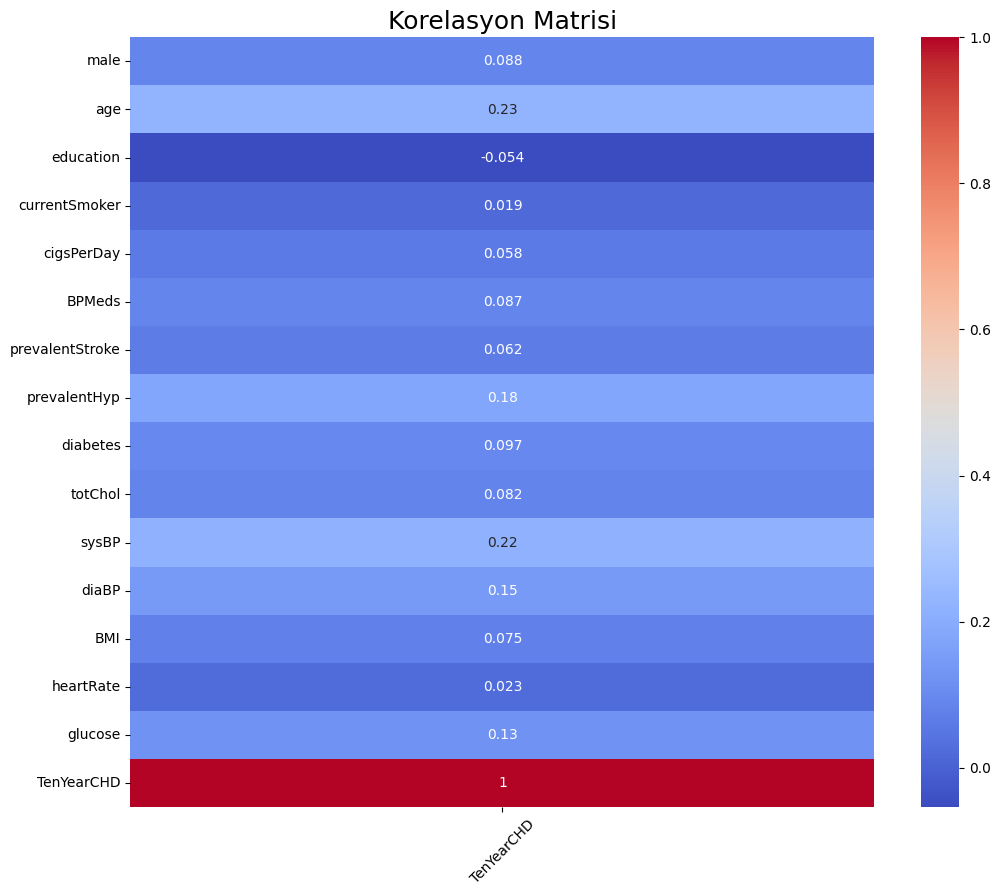

In [921]:
corr_matrix = copyData.corr()[['TenYearCHD']]
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Korelasyon Matrisi', fontsize=18)
plt.show()

###  Feature Scaling (Boyutlama)

In [922]:

data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [923]:
cols = data.columns
cols

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Let's scale the data

In [924]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


# let's create our model
### Let's increase accuracy with grid search

In [925]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("TenYearCHD",axis=1), data.TenYearCHD, test_size=0.2, random_state=2)

In [926]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [927]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1,5,7,10,20,30, 100], 'penalty': ['l1', 'l2',]}
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)
print("En iyi parametreler (best parameters): ", grid.best_params_)
print("En iyi çapraz doğrulama skoru (best score: ): {:.2f}".format(grid.best_score_))

En iyi parametreler (best parameters):  {'C': 10, 'penalty': 'l2'}
En iyi çapraz doğrulama skoru (best score: ): 0.86


 # We got an accuracy of % 86 in this project we made using logistic regression.